# Import Zone

In [ ]:
import random
import math
import copy

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Play ground

In [ ]:
def random_intial_matrix(rows, columns):
  # This function gets the dimention of matrix
  # and returns a 2D intial matrix with random 0,1 inputs
  matrix = []

  for i in range(rows):
    row = [random.randint(0, 1) for j in range(columns)]
    matrix.append(row)

  # Preventing the self loop
  for i in range(rows):
    matrix[i][i] = 0

  return matrix

In [ ]:
init_matrix = random_intial_matrix(10, 10)

In [ ]:
init_matrix

[[0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 0, 0, 1, 1, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 1, 0, 0]]

## Discretization

In [ ]:
def discretizer(matrix):
  # ToDO(optional): can discrete with other methods like median, mode, ...

  # This function gets a 2D array matrix (of genes, with any size)
  # and discretes it with average of each column in the ways that
  # if the cell is bigger than average of its column, value of
  # cell will be 1, if not value of cell will be equal to zero.
  # Then returns the discreted matrix.
  dis_matrix = []
  row_size = len(matrix)
  col_size = len(matrix[0])

  # Casting to float
  matrix = [[float(value) for value in row] for row in dataset_10[1:]]

  for c in range(col_size):
    # Extracting columns
    col = []
    for row in matrix:
      col.append(row[c])

    # Discretization
    average = sum(col) / len(col)
    dis_col = []

    for co in col:
      if co < average:
        dis_col.append(int(0))
      else:
        dis_col.append(int(1))

    # Appending discreted columns
    dis_matrix.append(dis_col)

  # Transposing to get the final discreted matrix
  dis_matrix = list(zip(*dis_matrix))
  return dis_matrix

In [ ]:
def dataset_reader(path):
  import csv

  # Specify the file path
  file_path = path

  # Initialization of dataset variable
  dataset = []

  # Open the file in read mode with the appropriate delimiter
  with open(file_path, "r", newline="") as _file:
      # Create a CSV reader object
      reader = csv.reader(_file, delimiter="\t")

      # Iterate over each row in the file
      for row in reader:
          # Access individual columns using index
          print(row)
          dataset.append(row)
  return dataset

In [ ]:
dataset_path = '/content/10_1_multifactorial.tsv'
dataset_10 = dataset_reader(dataset_path)

['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
['0.7472648', '0.0145174', '0.2768379', '0.5924924', '0.1137333', '0.4199753', '0.6704619', '0.7873434', '0.5851015', '0.6379321']
['0.1952416', '0.0666675', '0.4668403', '0.7665067', '0.5201448', '0.2495804', '0.3279500', '0.7170845', '0.7695890', '0.6548019']
['0.7684065', '0.1396432', '0.1299352', '0.6305152', '0.0016216', '0.2795217', '0.5784058', '0.6209451', '0.5909760', '0.6678004']
['0.4200291', '0.1071710', '0.3394158', '0.6284330', '0.2198180', '0.3295082', '0.6401604', '0.6728220', '0.4711612', '0.8043124']
['0.6475681', '0.0236604', '0.3494707', '0.5407625', '0.0477348', '0.1340377', '0.5038767', '0.4542435', '0.6125342', '0.6828942']
['0.2203427', '0.1879857', '0.3618787', '0.5945139', '0.4412289', '0.3384261', '0.4117165', '0.5654680', '0.6212083', '0.7913979']
['0.6844843', '0.1317679', '0.1523321', '0.7433527', '0.1428599', '0.3288338', '0.6494312', '0.7461721', '0.8482142', '0.6229009']
['0.5129848', '0.1413

In [ ]:
discreted_dataset_10 = discretizer(dataset_10)

In [ ]:
discreted_dataset_10

[(1, 0, 0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 1, 1, 1, 0, 0, 1, 1, 0),
 (1, 1, 0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 0, 1, 1, 0, 1),
 (1, 0, 1, 0, 0, 0, 1, 0, 0, 0),
 (0, 1, 1, 0, 1, 0, 0, 1, 0, 1),
 (1, 1, 0, 1, 0, 0, 1, 1, 1, 0),
 (0, 1, 1, 0, 0, 0, 0, 1, 1, 0),
 (1, 1, 1, 1, 0, 1, 0, 0, 1, 1),
 (0, 1, 1, 1, 1, 1, 0, 0, 1, 1)]

## Calculating the score of Matrix (graph)

In [ ]:
def dependency_finder(matrix):
  # This function is for finding the dependencies in a graph.
  # As an input, it gets the matrix of nodes(genes) relations
  # and returns all the dependencies.
  # We suppose that there is an edge from row to column (row =egde=> col)
  one_parent_tuples = []

  # Extracting all depenedncies with one edge(one parent)
  for index_row, row in enumerate(matrix):
    for index_col, col in enumerate(row):
      if col == 1:
        dependency = [index_row, index_col]
        one_parent_tuples.append(dependency)

  all_tuples = []
  child_genes = []

  # Finding all child nodes(genes)
  for tup in one_parent_tuples:
    child_gene = tup[-1]
    if child_gene not in child_genes:
      child_genes.append(child_gene)

  # Fixing the previous tuple with nodes(genes) with more that one parent
  for child in child_genes:
    temp_tuple = []
    for tup in one_parent_tuples:
      if child == tup[-1]:
        for node in tup[:-1]:
          temp_tuple.append(node)
    temp_tuple.append(child)
    all_tuples.append(temp_tuple)

  # Checking if there is a node without child, then appending
  # it to the all tuples
  for col_index in range(len(matrix)):
    column = [row[col_index] for row in matrix]

    flage_no_parent = 0
    for element in column:
      if element == 1:
        flage_no_parent = 1
    if flage_no_parent == 0:
      all_tuples.append([col_index])

  return all_tuples

In [ ]:
def sequence_extractor(sequence, given_array):
  # This function gets an array of sequence to create
  # an array from given_array with the sequence indexes
  # and return it. Note that sequence is zero-based.
  seq_array = []

  for index in sequence:
    seq_array.append(given_array[index])

  return seq_array

In [ ]:
def likelihood_calculation(discrete_dataset, graph_depen):
  # This function is for calcualting the likelihood of given dependency
  # graph(matrix) based on the dataset (probability of occuring the
  # dependency graph) and returns the probability of each node (gene)

  import math

  # Finding different states of each dependency (for the numerator)
  # creating a list of lists for each graph dependency:
  all_up_dependecies_states = []

  for depen in graph_depen:
    states_up = []
    for test in discrete_dataset:
      state = sequence_extractor(depen, test)

      if state not in states_up:
        states_up.append(state)
    all_up_dependecies_states.append(states_up)

  # Finding different states of each dependency (for the denominator)
  # creating a list of lists for each graph dependency:
  all_down_dependecies_states = []

  for depen in graph_depen:
    states_down = []
    depen_just_parents = depen[:-1]
    for test in discrete_dataset:
      state = sequence_extractor(depen_just_parents, test)

      if state not in states_down:
        states_down.append(state)
    all_down_dependecies_states.append(states_down)

  # Calculating probabilty of each state by counting
  # Counting for the nominator
  # Counting the up (nominator of prob =>ex. p(g1|g4) )
  # Note: We supose that the order of states_counts is like dependency array
  states_counts_up = []
  for _, up_states in enumerate(all_up_dependecies_states):
    depen = graph_depen[_]
    depen_state_counters = []
    for up_st in up_states:
      counter = 0
      for test in discrete_dataset:
        temp = sequence_extractor(depen, test)
        if temp == up_st:
          counter += 1
      depen_state_counters.append([counter, up_st[:-1]])
    depen_state_counters.append(depen[-1])
    states_counts_up.append(depen_state_counters)

  # print(f"states_counts_up: {states_counts_up}")

  # Counting the for denominator
  # Counting the down (denominator of prob =>ex. p(g1|g4) )
  states_counts_down = []
  for _, down_states in enumerate(all_down_dependecies_states):
    child = graph_depen[_][-1]
    depen = graph_depen[_][:-1]
    depen_state_counters = []
    for down_st in down_states:
      counter = 0
      for test in discrete_dataset:
        temp = sequence_extractor(depen, test)
        if temp == down_st:
          counter += 1
      depen_state_counters.append([counter, down_st])
    depen_state_counters.append(child)
    states_counts_down.append(depen_state_counters)

  # print(f"states_counts_down: {states_counts_down}")

  # Calculating probs of different states then multiplying them
  # Ex.states_counts_up: [[1, [0]], [2, [1]], [1, [0]], 1] => last element is the gene's number

  probs_of_genes = []
  for _, count_states_gene in enumerate(states_counts_up):

    likelihood_gene = 0

    # Last element of count_states_gene is the id of the gene
    for count_state_gene in count_states_gene[:-1]:
      numerator = count_state_gene[0]
      state = count_state_gene[1]

      # Last element of states_counts_down is the id of the gene
      for counts in states_counts_down[_][:-1]:
        if counts[1] == state:
          denumerator = counts[0]


      p = numerator / denumerator
      likelihood_gene += (math.log(p) * numerator)

    probs_of_genes.append([likelihood_gene, count_states_gene[-1]])
  return probs_of_genes, all_down_dependecies_states

In [ ]:
def LH_genes_multiplier(likelihoods):
  # This function multiples the probability of
  # all nodes(genes) and returns the final likelihood

  likelihood = 0
  for gene_lh in likelihoods:
    lh = gene_lh[0]
    likelihood += lh

  return likelihood

In [ ]:
def parameter_counter(genes_states_down):
  # This function gets the down(denumerator) states and counts
  # the amount of parameters, which is required for calculating BIC
  parameters_count = 0

  for gene_states in genes_states_down:
    parameters_count += len(gene_states)

  return parameters_count

In [ ]:
def calculater_of_BIC(likelihoods, k, n):
  # This function gets likelihoods, k which is number of
  # parameters, n which is number of data points and then
  # calculates the BIC of graph by this formula:
  # BIC = -2 * log(L) + k * log(n)
  import math

  likelihood = 0
  for gene_lh in likelihoods:
    lh = gene_lh[0]
    likelihood += lh

  # print(likelihood)
  BIC = (-2) * likelihood + k * (math.log(n))

  return BIC

In [ ]:
def possible_to_add(matrix):
  # This function is for checking if it
  # is possible to add a new edge or not
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if i == j:
        continue
      if matrix[i][j] == 0:
        return True
  return False

In [ ]:
def possible_to_remove(matrix):
  # This function is for checking if it
  # is possible to remove an edge or not
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if i == j:
        continue
      if matrix[i][j] == 1:
        return True
  return False

In [ ]:
def possible_to_reverse(matrix):
  # This function is for checking if it
  # is possible to reverse an edge or not
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if i == j:
        continue
      if matrix[i][j] == 0 and matrix[j][i] == 1:
        return True
      if matrix[i][j] == 1 and matrix[j][i] == 0:
        return True
  return False

In [ ]:
def new_matrix_proposer(pre_matrix):
  # This function gets the previous matrix and change it in one of
  # add, remove or reverse an edge ways with equal chance (= 1/3)
  # then propose a new matrix
  import copy

  previous_matrix = copy.deepcopy(pre_matrix)

  import random
  random_number = random.randint(1, 3)

  # print(previous_matrix)

  # Checking if it posible to do the operation
  # or not. If not creating another random number.
  possibilty_flage = False
  while not possibilty_flage:
    if random_number == 1:
      # Checking possibility of add
      if possible_to_add(previous_matrix) == False:
        random_number = random.randint(1, 3)
      else:
        possibilty_flage = True

    if random_number == 2:
      # Checking possibility of remove
      if possible_to_remove(previous_matrix) == False:
        random_number = random.randint(1, 3)
      else:
        possibilty_flage = True

    if random_number == 3:
      # Checking possibility of remove
      if possible_to_reverse(previous_matrix) == False:
        random_number = random.randint(1, 3)
      else:
        possibilty_flage = True

  # Proposing!
  # print(random_number)

  if random_number == 1:
    # Adding a new edge
    add_done_flage = False
    while not add_done_flage:
      rand_row = random.randint(0, len(previous_matrix)-1)
      rand_col = random.randint(0, len(previous_matrix[0])-1)

      if rand_row == rand_col:
        continue

      if previous_matrix[rand_row][rand_col] == 0:
        previous_matrix[rand_row][rand_col] = 1
        add_done_flage = True

    new_proposed_matrix = previous_matrix

  elif random_number == 2:
    # Removing an edge
    remove_done_flage = False
    while not remove_done_flage:
      rand_row = random.randint(0, len(previous_matrix)-1)
      rand_col = random.randint(0, len(previous_matrix[0])-1)

      if rand_row == rand_col:
        continue

      if previous_matrix[rand_row][rand_col] == 1:
        previous_matrix[rand_row][rand_col] = 0
        remove_done_flage = True

    new_proposed_matrix = previous_matrix

  elif random_number == 3:
    # Revesing an edge
    reverse_done_flage = False

    while not reverse_done_flage:
      rand_row = random.randint(0, len(previous_matrix)-1)
      rand_col = random.randint(0, len(previous_matrix[0])-1)

      if (rand_row == rand_col) or previous_matrix[rand_row][rand_col] == 0:
        continue

      reverse_done_flage = True

    previous_matrix[rand_row][rand_col] = 0
    previous_matrix[rand_col][rand_row] = 1

    new_proposed_matrix = previous_matrix

  # operations = ["add", "remove", "reverse"]
  # print(f"<<{operations[random_number-1]}>> has applied to previous matrix,", end=" ")
  # print(f"on pose [{rand_row}, {rand_col}]. \n")

  return new_proposed_matrix

In [ ]:
graph_dependency = dependency_finder(init_matrix)

In [ ]:
discreted_dataset_10

[(1, 0, 0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 1, 1, 1, 0, 0, 1, 1, 0),
 (1, 1, 0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 0, 1, 1, 0, 1),
 (1, 0, 1, 0, 0, 0, 1, 0, 0, 0),
 (0, 1, 1, 0, 1, 0, 0, 1, 0, 1),
 (1, 1, 0, 1, 0, 0, 1, 1, 1, 0),
 (0, 1, 1, 0, 0, 0, 0, 1, 1, 0),
 (1, 1, 1, 1, 0, 1, 0, 0, 1, 1),
 (0, 1, 1, 1, 1, 1, 0, 0, 1, 1)]

In [ ]:
graph_dependency

[[0, 4, 5, 6, 7, 8, 9, 1],
 [0, 7, 8, 9, 2],
 [0, 1, 2, 4, 7, 6],
 [1, 2, 3, 4, 5, 6, 7, 8, 0],
 [1, 2, 5, 6, 7, 8, 4],
 [1, 5, 8, 9, 7],
 [2, 4, 6, 7, 8, 3],
 [2, 3, 4, 7, 5],
 [2, 3, 4, 5, 8],
 [7, 8, 9]]

In [ ]:
genes_likelihood, states_down = likelihood_calculation(discreted_dataset_10, graph_dependency)

In [ ]:
parameter_counter(states_down)

84

In [ ]:
genes_likelihood

[[0.0, 1],
 [-1.3862943611198906, 2],
 [0.0, 6],
 [0.0, 0],
 [-1.3862943611198906, 4],
 [0.0, 7],
 [0.0, 3],
 [-1.3862943611198906, 5],
 [-1.3862943611198906, 8],
 [-2.772588722239781, 9]]

In [ ]:
LH_genes_multiplier(genes_likelihood)

-8.317766166719343

In [ ]:
n = len(discreted_dataset_10)
k = parameter_counter(states_down)

calculater_of_BIC(genes_likelihood, k, n)

210.05268014493853

## Metropolice Hastings

In [ ]:
def metropolice_hastings_acceptence_LH(last_accepted_matrix, proposed_matrix, discrete_dataset):
  # This function is for deciding wheather accepting a proposed
  # graph or not, by getting last accepted proposed matrix, the
  # new proposed matrix and also the related dataset then calculating
  # likelihood

  last_accepted_depen_graph = dependency_finder(last_accepted_matrix)
  LH_last_accepted_matrix, down_states = likelihood_calculation(discrete_dataset, last_accepted_depen_graph)
  # print(LH_last_accepted_matrix)
  # Calculating the score of likelihood of matrix
  LH_score_last_accepted_matrix = LH_genes_multiplier(LH_last_accepted_matrix)

  new_proposed_depen_graph = dependency_finder(proposed_matrix)
  LH_new_proposed_matrix, down_states = likelihood_calculation(discrete_dataset, new_proposed_depen_graph)
  # print(LH_new_proposed_matrix)
  # Calculating the score of likelihood of matrix
  LH_score_new_proposed_matrix = LH_genes_multiplier(LH_new_proposed_matrix)

  # print(LH_score_last_accepted_matrix)
  metro_police_measure = min(1, (LH_score_new_proposed_matrix / LH_score_last_accepted_matrix))

  chance = random.random()
  if metro_police_measure >= chance:
    accepted_flage = True
  else:
    accepted_flage = False

  return LH_score_new_proposed_matrix, accepted_flage

In [ ]:
def metropolice_hastings_acceptence_BIC(last_accepted_matrix, proposed_matrix, discrete_dataset):
  # This function is for deciding wheather accepting a proposed
  # graph or not, by getting last accepted proposed matrix, the
  # new proposed matrix and also the related dataset then calculating
  # BIC

  last_accepted_depen_graph = dependency_finder(last_accepted_matrix)
  LH_last_accepted_matrix, down_states = likelihood_calculation(discrete_dataset, last_accepted_depen_graph)
  k = parameter_counter(down_states)
  n = len(discrete_dataset)
  last_accepted_BIC = calculater_of_BIC(LH_last_accepted_matrix, k, n)

  new_proposed_depen_graph = dependency_finder(proposed_matrix)
  LH_new_proposed_matrix, down_states = likelihood_calculation(discrete_dataset, new_proposed_depen_graph)
  k = parameter_counter(down_states)
  n = len(discrete_dataset)
  new_proposed_BIC = calculater_of_BIC(LH_last_accepted_matrix, k, n)

  if last_accepted_BIC == 0:
    return last_accepted_BIC, False
    # last_accepted_BIC += 1

  metro_police_measure = min(1, (new_proposed_BIC / last_accepted_BIC))

  chance = random.random()
  if metro_police_measure >= chance:
    accepted_flage = True
  else:
    accepted_flage = False

  return new_proposed_BIC, accepted_flage

In [ ]:
def graph_fitter(intial_matrix, discreted_dataset, measure):
  # Array of proposed matrixes
  proposed_matrixes = []
  # Array of scores of matrixes
  score_values = []

  proposed_matrixes.append(intial_matrix)

  # Fitting the matrix!
  from IPython.display import clear_output
  epochs = 1000

  for _ in range(epochs):
    # Clear the current cell's output
    clear_output(wait=True)
    print(f"{_ + 1}/{epochs}")

    new_proposed_matrix = new_matrix_proposer(proposed_matrixes[-1])

    if measure == "BIC":
      # print(score_values[-3:])

      BIC_value, accepted = metropolice_hastings_acceptence_BIC(proposed_matrixes[-1], new_proposed_matrix, discreted_dataset)
      score_values.append(BIC_value)

      # if BIC_value == 0:
      #   break

    if measure == "LH":
      LH_value, accepted = metropolice_hastings_acceptence_LH(proposed_matrixes[-1], new_proposed_matrix, discreted_dataset)
      score_values.append(LH_value)

      # if LH_value == 0:
      #   break

    if accepted == True:
      proposed_matrixes.append(new_proposed_matrix)
    else:
      proposed_matrixes.append(proposed_matrixes[-1])

  return proposed_matrixes, score_values

In [ ]:
# Array of initial matrixes
intial_matrixes = []

branches_number = 3
for _ in range(branches_number):
  init_matrix = random_intial_matrix(10, 10)
  intial_matrixes.append(init_matrix)

In [ ]:
# Fitting the graphs by LH
storage_different_branches_propoesd_matrixes_LH = []
storage_different_branches_LH_scores = []

measure = "LH"
for initial_matrix in intial_matrixes:
  proposed_matrixes, score_values = graph_fitter(initial_matrix, discreted_dataset_10, measure)
  storage_different_branches_propoesd_matrixes_LH.append(proposed_matrixes)
  storage_different_branches_LH_scores.append(score_values)

1000/1000


In [ ]:
# Fitting the graphs by BIC
storage_different_branches_propoesd_matrixes_BIC = []
storage_different_branches_BIC_scores = []

measure = "BIC"
for initial_matrix in intial_matrixes:
  proposed_matrixes, score_values = graph_fitter(initial_matrix, discreted_dataset_10, measure)
  storage_different_branches_propoesd_matrixes_BIC.append(proposed_matrixes)
  storage_different_branches_BIC_scores.append(score_values)

1000/1000


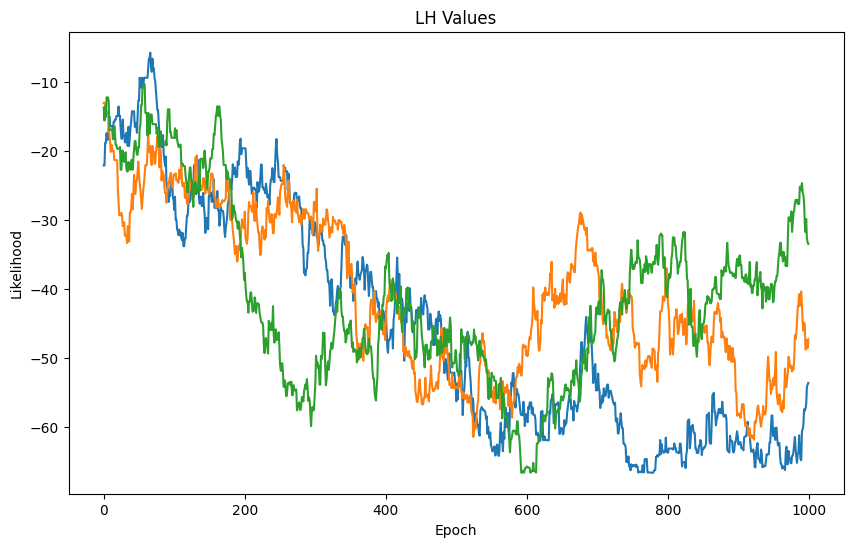

In [ ]:
import matplotlib.pyplot as plt

# Changing width and height
plt.figure(figsize=(10, 6))

# Plotting the likelihood values array
for branch in storage_different_branches_LH_scores:
  plt.plot(branch)

plt.xlabel('Epoch')
plt.ylabel('Likelihood')
plt.title('LH Values')
plt.show()

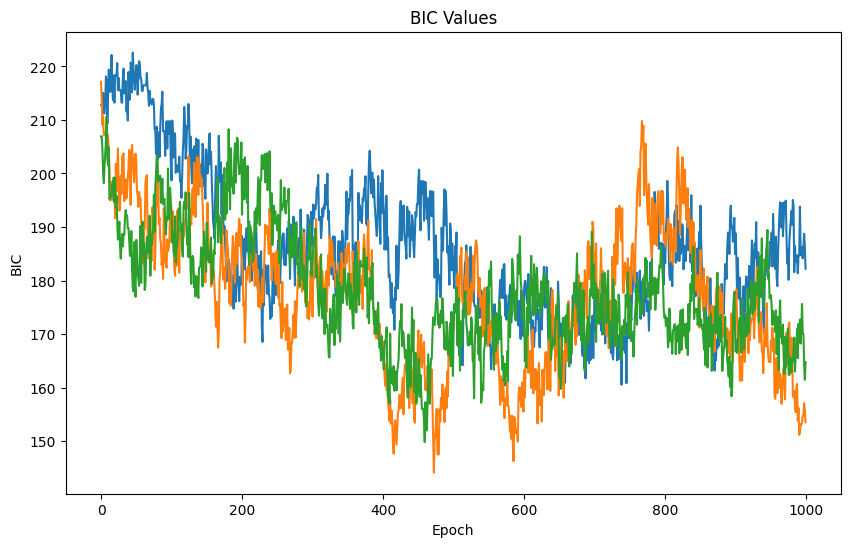

In [ ]:
import matplotlib.pyplot as plt

# Changing width and height
plt.figure(figsize=(10, 6))

# Plotting the likelihood values array
for branch in storage_different_branches_BIC_scores:
  plt.plot(branch)

plt.xlabel('Epoch')
plt.ylabel('BIC')
plt.title('BIC Values')
plt.show()

## Getting final matrix

In [ ]:
# Getting the last 10 percent of all matrixes of branches (burning period)
# By BIC measure
each_branch_matrixes_length = len(storage_different_branches_propoesd_matrixes_BIC[1])
burning_period_count = int(each_branch_matrixes_length * 0.1)

best_graphs_of_branches = []
for branch in storage_different_branches_propoesd_matrixes_BIC:
  matrixes = branch[(-1 * burning_period_count):]
  best_graphs_of_branches.append(matrixes)

In [ ]:
# Calculating average of each edge of last 10 percent graphs
length_of_a_matrix = int(len(best_graphs_of_branches[0][0]))
branch_count = len(storage_different_branches_propoesd_matrixes_BIC)

# Creating a matrix of averages for each of branches
average_branch_matrixes = []
for _ in range(branch_count):
  average_of_10_percent_graph = []
  for i in range(length_of_a_matrix):
    row = [0 for j in range(length_of_a_matrix)]
    average_of_10_percent_graph.append(row)

  average_branch_matrixes.append(average_of_10_percent_graph)

each_branch_count = len(best_graphs_of_branches[0])
for index, branch in enumerate(best_graphs_of_branches):
  # Getting average of last 10 percent of matrixes
  this_branch_average = average_branch_matrixes[index]
  for row in range(length_of_a_matrix):
    for col in range(length_of_a_matrix):
      for matrix in (branch):
        this_branch_average[row][col] += matrix[row][col]
      this_branch_average[row][col] = this_branch_average[row][col] / each_branch_count

In [ ]:
average_branch_matrixes

[[[0.0, 0.0, 0.0, 0.79, 0.0, 0.32, 0.0, 0.0, 0.32, 0.09],
  [0.01, 0.0, 0.0, 0.0, 0.63, 0.88, 0.0, 0.57, 0.0, 0.07],
  [0.35, 0.0, 0.0, 0.0, 0.0, 0.17, 0.56, 0.0, 0.0, 1.0],
  [0.73, 0.0, 0.0, 0.0, 0.0, 0.62, 0.09, 0.0, 0.36, 0.21],
  [0.29, 0.88, 0.0, 0.0, 0.0, 0.0, 0.32, 0.0, 0.13, 0.4],
  [0.38, 0.97, 0.15, 0.02, 1.0, 0.0, 0.65, 0.21, 0.53, 0.0],
  [0.0, 0.8, 0.44, 0.98, 0.41, 0.14, 0.0, 0.32, 0.18, 0.0],
  [0.34, 0.0, 1.0, 0.0, 0.0, 0.88, 0.37, 0.0, 0.68, 0.16],
  [0.24, 0.0, 0.0, 0.4, 0.04, 0.3, 0.5, 0.5, 0.0, 0.4],
  [0.0, 0.23, 0.23, 0.28, 0.3, 0.38, 0.0, 0.0, 0.11, 0.0]],
 [[0.0, 0.0, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3],
  [0.0, 0.0, 0.0, 0.43, 0.09, 0.0, 0.0, 0.15, 0.22, 0.29],
  [0.16, 0.0, 0.0, 0.08, 0.26, 0.0, 0.0, 0.18, 0.0, 0.0],
  [0.0, 0.13, 0.65, 0.0, 0.06, 0.01, 0.09, 0.0, 0.13, 0.02],
  [0.0, 0.15, 0.09, 0.0, 0.0, 0.25, 0.03, 0.54, 0.21, 0.18],
  [0.0, 0.0, 0.37, 0.01, 0.32, 0.0, 0.0, 0.01, 0.0, 0.09],
  [0.11, 0.12, 0.0, 0.09, 0.0, 0.0, 0.0, 0.0, 0.1, 0.21],
 

In [ ]:
# Getting average of each average branch matrix

# Creating a matrix of averages for each of branches
average_of_average_branch_matrixes = []
for i in range(length_of_a_matrix):
  row = [0 for j in range(length_of_a_matrix)]
  average_of_average_branch_matrixes.append(row)

average_graph_count = len(average_branch_matrixes)

for row in range(length_of_a_matrix):
  for col in range(length_of_a_matrix):
    for matrix in (average_branch_matrixes):
      average_of_average_branch_matrixes[row][col] += matrix[row][col]
    average_of_average_branch_matrixes[row][col] = average_of_average_branch_matrixes[row][col] / average_graph_count

In [ ]:
# Calculating the TP, TN, FP and FN
# Todo: reading the gold matrix from the file

gold_matrix = [[0,0,1,1,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,1,0,0,1,0,0,0],
          [0,0,1,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0,0,0],
          [0,0,1,1,0,0,0,0,0,0],
          [0,1,0,0,0,1,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,1],
          [0,0,1,1,0,0,0,0,0,0]]

In [ ]:
depen_gold = dependency_finder(gold_matrix)
lhs, b = likelihood_calculation(discreted_dataset_10, depen_gold)
LH_genes_multiplier(lhs)

-47.09819814741001

In [ ]:
def comaring_measures(average_matrix, true_matrix, treshold):
  # Calculate true positives (TP), true negatives (TN), false positives (FP),
  # false negatives (FN)
  # Note: we supose that having egde is our measure

  # Discreting the average graph by teshold
  import copy
  ave_matrix = copy.deepcopy(average_matrix)

  for row_index, row in enumerate(ave_matrix):
    for col_index, col in enumerate(row):
      if ave_matrix[row_index][col_index] >= treshold:
        ave_matrix[row_index][col_index] = 1
      else:
        ave_matrix[row_index][col_index] = 0

  # print(ave_matrix)
  # calcualating measures
  tp = 0
  tn = 0
  fp = 0
  fn = 0

  for row_index, row in enumerate(ave_matrix):
    for col_index, col in enumerate(row):
      if ave_matrix[row_index][col_index] == 1 and true_matrix[row_index][col_index] == 1:
        tp += 1
      if ave_matrix[row_index][col_index] == 0 and true_matrix[row_index][col_index] == 0:
        tn += 1
      if ave_matrix[row_index][col_index] == 1 and true_matrix[row_index][col_index] == 0:
        fp += 1
      if ave_matrix[row_index][col_index] == 0 and true_matrix[row_index][col_index] == 1:
        fn += 1

  return tp, tn, fp, fn

In [ ]:
treshold = 0.3
tp, tn, fp, fn = comaring_measures(average_of_average_branch_matrixes, gold_matrix, treshold)

In [ ]:
print(f"True Positives  (TP)  = {tp} ({tp / (len(gold_matrix) * len(gold_matrix))})")
print(f"True Negatives  (TN)  = {tn} ({tn / (len(gold_matrix) * len(gold_matrix))})")
print(f"False Positives (FP)  = {fp} ({fp / (len(gold_matrix) * len(gold_matrix))})")
print(f"False Negatives (FN)  = {fn} ({fn / (len(gold_matrix) * len(gold_matrix))})")

True Positives  (TP)  = 3 (0.03)
True Negatives  (TN)  = 78 (0.78)
False Positives (FP)  = 8 (0.08)
False Negatives (FN)  = 11 (0.11)


In [ ]:
def roc_calculator(y_true, y_scores):
  # This function is for calculating false positive rate (FPR),
  # true positive rate (TPR),

  from sklearn.metrics import roc_curve, roc_auc_score
  import matplotlib.pyplot as plt

  # Flatten the arrays
  y_true_flattened = [label for sublist in y_true for label in sublist]
  y_scores_flattened = [score for sublist in y_scores for score in sublist]

  # Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
  fpr, tpr, thresholds = roc_curve(y_true_flattened, y_scores_flattened)

  # Calculate the area under the ROC curve (AUC)
  auc = roc_auc_score(y_true_flattened, y_scores_flattened)

  return auc, fpr, tpr, thresholds

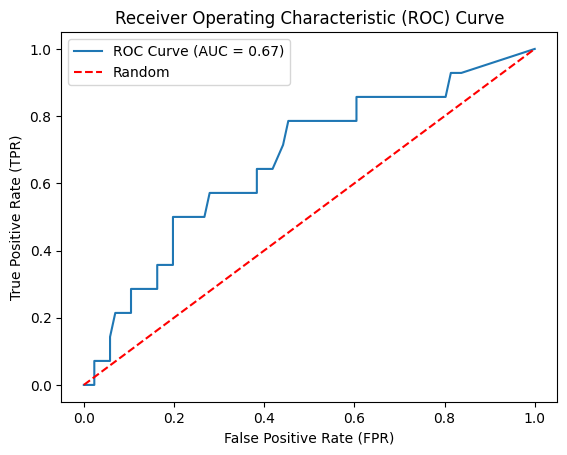

In [ ]:
auc, fpr, tpr, thresholds = roc_calculator(gold_matrix, average_of_average_branch_matrixes)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Test field

In [ ]:
test_matrix = [
    [0, 1, 1],
    [0, 0, 1],
    [0, 0, 0]
]

In [ ]:
dependency_finder(test_matrix)

[[0, 1], [0, 1, 2]]

In [ ]:
fake_dataset = [
    [0, 1, 1, 0],
    [1, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0]
]

fake_graph = [
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0]
]

In [ ]:
fake_dataset

[[0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0]]

In [ ]:
fake_dependencies = dependency_finder(fake_graph)

In [ ]:
all_up_dependecies_states = []

for depen in fake_dependencies:
  states_up = []
  for test in fake_dataset:
    state = sequence_extractor(depen, test)

    if state not in states_up:
      states_up.append(state)
  all_up_dependecies_states.append(states_up)

# Finding different states of each dependency (for the denominator)
# creating a list of lists for each graph dependency:
all_down_dependecies_states = []

for depen in fake_dependencies:
  states_down = []
  depen_just_parents = depen[:-1]
  for test in fake_dataset:
    state = sequence_extractor(depen_just_parents, test)

    if state not in states_down:
      states_down.append(state)
  all_down_dependecies_states.append(states_down)

In [ ]:
all_down_dependecies_states

[[[0], [1]], [[0, 1], [1, 1], [0, 0]], [[1], [0]], [[0]]]

In [ ]:
fake_dependencies

# Checked

[[0, 1], [0, 1, 2], [2, 3], [3, 0]]

In [ ]:
states_counts_up = []
for _, up_states in enumerate(all_up_dependecies_states):
  depen = fake_dependencies[_]
  depen_state_counters = []
  for up_st in up_states:
    counter = 0
    for test in fake_dataset:
      temp = sequence_extractor(depen, test)
      if temp == up_st:
        counter += 1
    depen_state_counters.append([counter, up_st[:-1]])
  depen_state_counters.append(depen[-1])
  states_counts_up.append(depen_state_counters)

In [ ]:
all_up_dependecies_states

[[[0, 1], [1, 1], [0, 0]],
 [[0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1]],
 [[1, 0], [0, 0]],
 [[0, 0], [0, 1]]]

In [ ]:
states_counts_up

[[[1, [0]], [2, [1]], [1, [0]], 1],
 [[1, [0, 1]], [1, [1, 1]], [1, [0, 0]], [1, [1, 1]], 2],
 [[3, [1]], [1, [0]], 3],
 [[2, [0]], [2, [0]], 0]]

In [ ]:
genes_likelihood, states_down = likelihood_calculation(fake_dataset, fake_dependencies)

In [ ]:
genes_likelihood

[[0.25, 1], [0.25, 2], [1.0, 3], [0.0625, 0]]

In [ ]:
LH_genes_multiplier(genes_likelihood)

-5.545177444479562

In [ ]:
target = [[0,0,1,1,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,1,0,0,1,0,0,0],
          [0,0,1,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0,0,0],
          [0,0,1,1,0,0,0,0,0,0],
          [0,1,0,0,0,1,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,1],
          [0,0,1,1,0,0,0,0,0,0]]

In [ ]:
last_accepted_depen_graph = dependency_finder(target)
LH_last_accepted_matrix, down_states = likelihood_calculation(discreted_dataset_10, last_accepted_depen_graph)

In [ ]:
last_accepted_depen_graph

[[0, 3, 6, 9, 2], [0, 2, 6, 9, 3], [0, 4], [2, 6], [5, 7, 1], [7, 5], [8, 9]]

In [ ]:
LH_last_accepted_matrix

[[0.14814814814814814, 2],
 [0.009259259259259259, 3],
 [0.08192000000000002, 4],
 [0.06697959533607684, 6],
 [0.021947873799725647, 1],
 [0.008393004372570706, 5],
 [0.0011943936000000002, 9]]

In [ ]:
LH_genes_multiplier(LH_last_accepted_matrix)

-27.126611515662166

In [ ]:
fup

[[[1, [0]], [2, [1]], [1, [0]], 1],
 [[1, [0, 1]], [1, [1, 1]], [1, [0, 0]], [1, [1, 1]], 2],
 [[3, [1]], [1, [0]], 3],
 [[2, [0]], [2, [0]], 0]]

In [ ]:
fdown

[[[2, [0]], [2, [1]], 1],
 [[1, [0, 1]], [2, [1, 1]], [1, [0, 0]], 2],
 [[3, [1]], [1, [0]], 3],
 [[4, [0]], 0]]

In [ ]:
fdep_up

[[[0, 1], [1, 1], [0, 0]],
 [[0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1]],
 [[1, 0], [0, 0]],
 [[0, 0], [0, 1]]]

In [ ]:
fdep_down

[[[0], [1]], [[0, 1], [1, 1], [0, 0]], [[1], [0]], [[0]]]

In [ ]:
new_matrix_proposer(init_matrix)

<<add>> has applied to previous matrix, on pose [4, 9]. 



[[0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1]]

In [ ]:
test_mat = [[0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 1, 0, 0]]

In [ ]:
dep_t = dependency_finder(test_mat)

In [ ]:
lhs, a = likelihood_calculation(discreted_dataset_10, dep_t)

In [ ]:
lhs

[[0.0, 1],
 [-1.3862943611198906, 2],
 [0.0, 6],
 [-1.3862943611198906, 4],
 [0.0, 7],
 [0.0, 3],
 [-1.3862943611198906, 5],
 [-1.3862943611198906, 8],
 [-2.772588722239781, 9],
 [-6.931471805599453, 0]]